In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


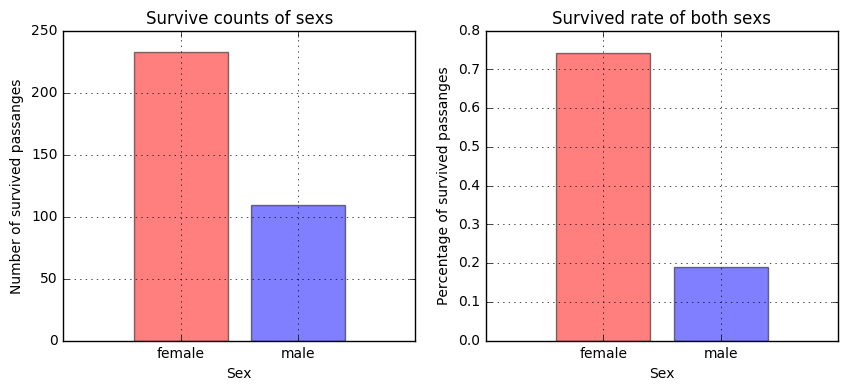

In [220]:
# set male = 1, female = 0
male = data[data['Sex'] == 'male']
female = data[data.Sex == 'female']

# print survived_male.value_counts().iloc[0], len(survived_male.index)
# print '-----'
# print survived_female.value_counts().iloc[0], len(survived_female.index)

survived_male = male['Survived'] == 1
survived_female = female['Survived'] == 1

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.bar(0, survived_female.sum(), color='r', alpha=0.5, align='center')
ax1.bar(1, survived_male.sum(), color='b', alpha=0.5, align="center")
ax1.grid()
ax1.set_xlim([-1, 2])
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['female', 'male'])
ax1.set_xlabel('Sex')
ax1.set_ylabel('Number of survived passanges')
ax1.set_title('Survive counts of sexs')

ax2 = fig.add_subplot(122)
ax2.bar(0, float(survived_female.sum())/len(survived_female.index), color='r', alpha=0.5, align='center')
ax2.bar(1, float(survived_male.sum())/len(survived_male.index), color='b', alpha=0.5, align='center')
ax2.grid()
ax2.set_xlim([-1, 2])
ax2.set_xlabel('Sex')
ax2.set_ylabel('Percentage of survived passanges')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['female', 'male'])
ax2.set_title('Survived rate of both sexs')
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in divide


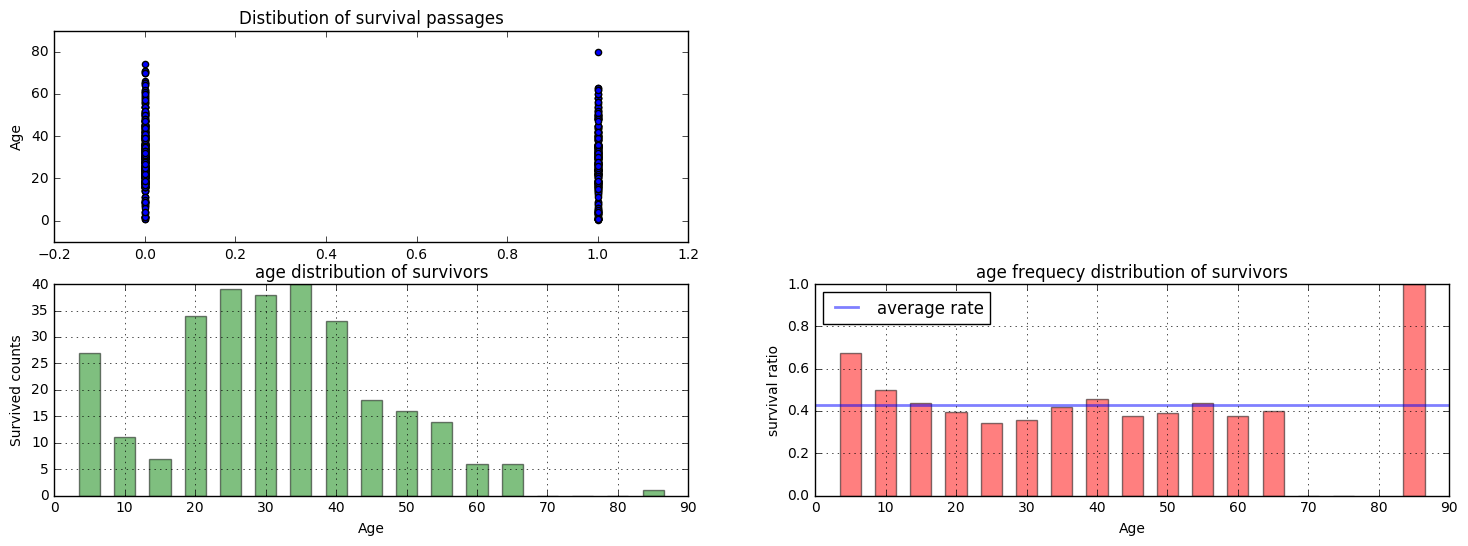

In [249]:
def age_analysis(data):
    fig = plt.figure(figsize=(18, 6))
    ageData = data[data['Age'].notnull()]
    ageData['Age'] = ageData['Age'].astype(int)
    survived = ageData[ageData.Survived == 1]
    
    # age for alive or die
    survived_age = data[data.Survived==1]['Age']
    ax3 = fig.add_subplot(221)
    ax3.scatter(data.Survived, data.Age)
    ax3.set_ylabel("Age")
    ax3.set_title('Distibution of survival passages')

    # survived people counts histogram
    hist = []
    for i in range(1, 18):
        hist.append( len(survived[ (survived['Age'] >= (i-1)*5) & (survived['Age'] < i*5) ]) )
        
    ax1 = fig.add_subplot(223)
    ax1.set_title('age distribution of survivors')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Survived counts')
    ax1.grid()
    ax1.bar(range(5, 90, 5), hist, width = 3, align='center', color = 'g', alpha = 0.5)
    
    age = []
    for i in range(1, 18):
        age.append( len(ageData[ (ageData['Age'] >= (i-1)*5) & (ageData['Age'] < i*5) ]) )

    ax2 = fig.add_subplot(224)
    ax2.set_title('age frequecy distribution of survivors')
    ax2.set_xlabel('Age')
    ax2.set_ylabel('survival ratio')
    # solve for ratio vs age
    survived_ratio = np.array(hist)/np.array(age, np.float)
    
    ax2.bar(range(5, 90, 5), survived_ratio, width = 3, align='center', color='r', alpha=0.5)
    averRate = sum(survived_ratio[0:13]) / 13
    ax2.plot((0, 90), (averRate, averRate), color='b', linewidth=2, alpha=0.5, label='average rate')
    ax2.legend(loc='best')
    ax2.grid()
    plt.show()
    
age_analysis(data)

年纪小的反而幸存率高！85岁存活率100%，但是只有一个人，说明不了什么问题，age是一个明显的特征，需要考虑
再看一下fare，票价贵说明有钱，一般有钱，舱位好容易获救，但是cabin缺值太多，先看fare

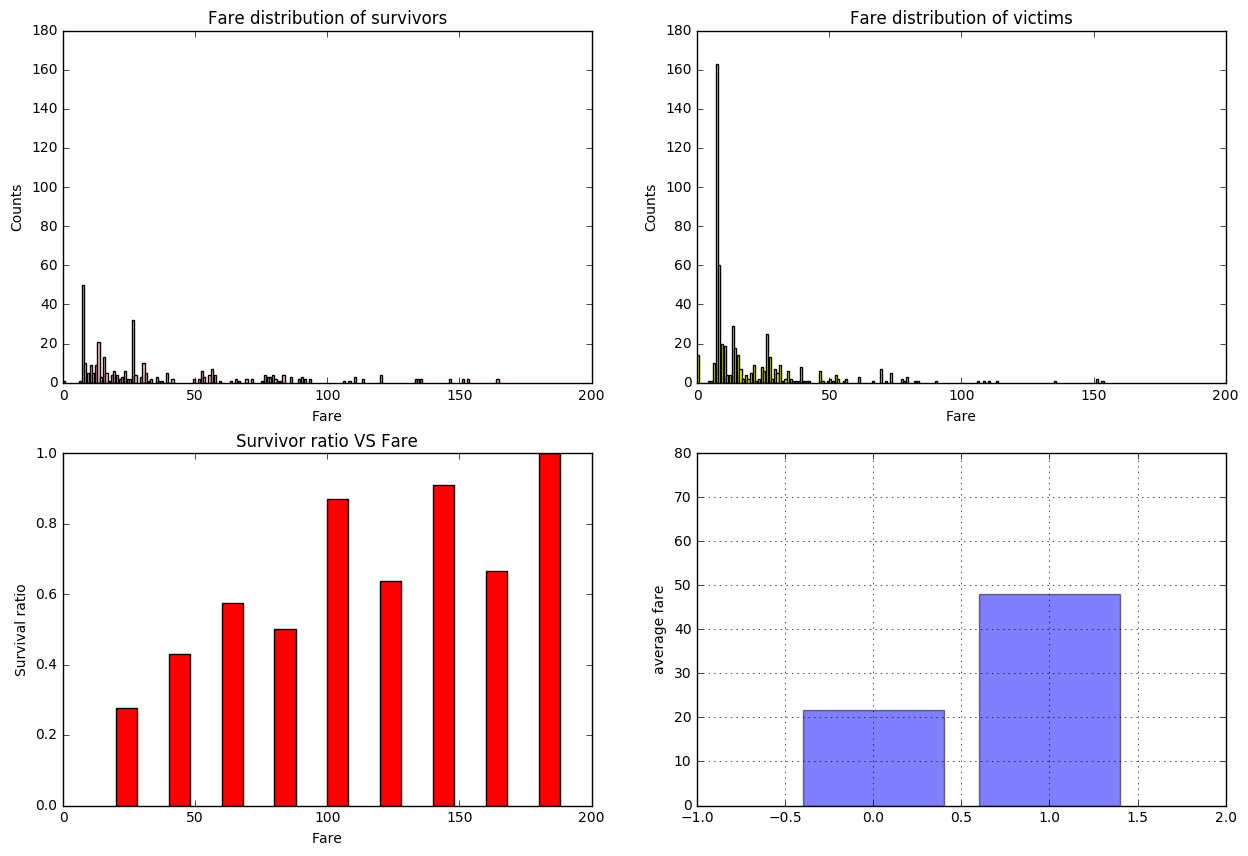

In [334]:
fareData = data[data['Fare'].notnull()]
fareData['Fare'] = fareData['Fare'].astype(int)
survivedFare = fareData[fareData.Survived == 1]
dieFare = fareData[fareData.Survived == 0]


survivedF = survivedFare.groupby('Fare').size()
dieF = dieFare.groupby('Fare').size()

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax1.set_title('Fare distribution of survivors')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Counts')
ax1.set_xlim([0, 200])
ax1.set_ylim([0, 180])
ax1.bar(survivedF.index, survivedF, color='pink')

ax2 = fig.add_subplot(222)
ax2.set_title('Fare distribution of victims')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Counts')
ax2.set_ylim([0, 180])
ax2.set_xlim([0, 200])
ax2.bar(dieF.index, dieF, color='yellow')

ratio = []
for i in range(1, 11):
    fare_range = fareData[ (fareData['Fare'] >= (i-1)*20) & (fareData['Fare'] < i*20) ]
    N_total = len(fare_range)
    N_survive = len(fare_range[fare_range['Survived'] == 1])
    if N_total == 0:
        ratio.append(0.0)
    else:
        ratio.append(N_survive / float(N_total))
        

ax3 = fig.add_subplot(223)
ax3.set_title('Survivor ratio VS Fare')
ax3.set_xlim([0, 200])
ax3.set_xlabel('Fare')
ax3.set_ylabel('Survival ratio')
ax3.bar(range(20, 220, 20), ratio, color='r', width=8)

y1 = sum(survivedF.index * survivedF) / float(sum(survivedF))
y2 = sum(dieF.index * dieF) / float(sum(dieF))
ax4 = fig.add_subplot(224)
ax4.set_xlim([-1, 2])
ax4.set_ylim([0, 80])
ax4.set_ylabel('average fare')
ax4.grid()
ax4.bar((0, 1), (y2, y1), align='center', alpha=0.5)
plt.show()

 确实票价贵生存率比票价便宜的生存率高，Fare需要被考虑到特征

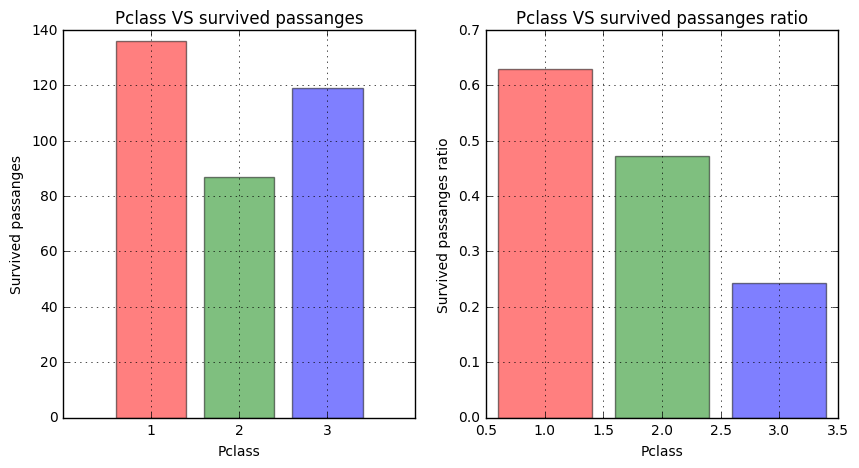

In [398]:
Pclass_alive = data[data.Survived == 1]
len(Pclass_alive[Pclass_alive.Pclass == 1])

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
Pclass_ = []
for i in range(1, 4):
    Pclass_.append(len(Pclass_alive[Pclass_alive.Pclass == i]))
    
ax1.bar(1, Pclass_[0], color='r', align='center', alpha=0.5)
ax1.bar(2, Pclass_[1], color='g', align='center', alpha=0.5)
ax1.bar(3, Pclass_[2], color='b', align='center', alpha=0.5)
ax1.set_xlim([0, 4])
ax1.set_xticks([1, 2, 3])
ax1.grid()
ax1.set_xlabel('Pclass')
ax1.set_title('Pclass VS survived passanges')
ax1.set_ylabel('Survived passanges')


ax2 = fig.add_subplot(122)
ax2.bar(1, float(Pclass_[0])/len(data[data.Pclass == 1]), color='r', align='center', alpha=0.5)
ax2.bar(2, float(Pclass_[1])/len(data[data.Pclass == 2]), color='g', align='center', alpha=0.5)
ax2.bar(3, float(Pclass_[2])/len(data[data.Pclass == 3]), color='b', align='center', alpha=0.5)
ax2.grid()
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Survived passanges ratio')
ax2.set_title('Pclass VS survived passanges ratio')
plt.show()

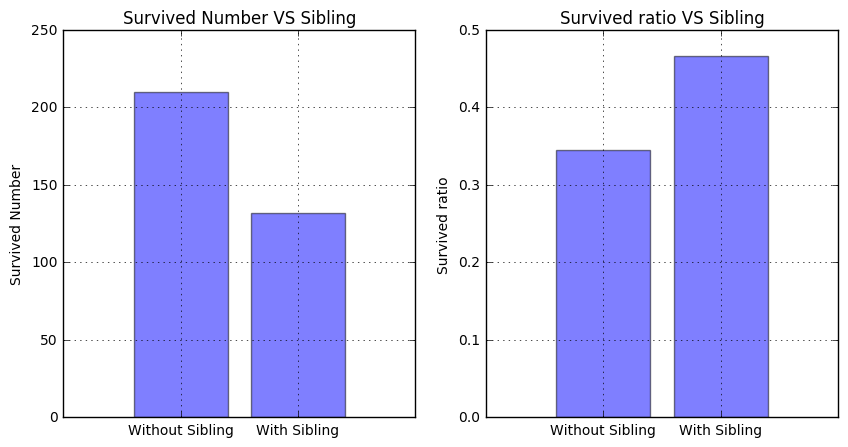

608


In [438]:
# plt.plot([0,1,2,3,4,5,8], data.groupby('SibSp').size())
# plt.show()
data['SibSp'] = data['SibSp'].dropna()
fig = plt.figure(figsize=(10, 5))
alive = data[data.Survived == 1]
ax1 = fig.add_subplot(121)
ax1.bar((0, 1), (len(alive[alive.SibSp == 0]), len(alive[alive.SibSp != 0])), align='center', alpha=0.5)
ax1.set_xlim([-1, 2])
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Without Sibling', 'With Sibling'])
ax1.set_ylabel('Survived Number')
ax1.set_title('Survived Number VS Sibling')
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.bar((0, 1), (len(alive[alive.SibSp == 0])/float(len(data[data.SibSp==0])), 
                 len(alive[alive.SibSp != 0])/float(len(data[data.SibSp!=0]))), alpha=0.5, align='center')
ax2.set_xlim(-1, 2)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Without Sibling', 'With Sibling'])
ax2.set_ylabel('Survived ratio')
ax2.set_title('Survived ratio VS Sibling')
ax2.grid()
plt.show()

print len(data[data.SibSp==0])

幸存的人中有亲属的人数比没有亲属的人数少，但是存活率有亲属的确高，SibSp可以看作是特征之一
我们目前可以把(年龄，性别，票价，有无亲属，舱位)作为特征向量，在处理的时候还需要preprocessing以下，这些数据还是在IDE里比较方便